In [2]:
import geopandas as gpd
import momepy
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

In [11]:
# three_m = gpd.read_file("data/streets_zurich_subset_2D.geojson").explode()[['OBJECTID', 'ERSTELLUNG', 'BELAGSART', 'OBJEKTART', 'SHAPE_Leng', 'geometry']]
# three_m.head()

roads = gpd.read_file("../data/geodata/small_subset/roads_zh_curvy_9features.geojson").explode()[['OBJECTID', 'ERSTELLUNG', 'BELAGSART', 'OBJEKTART', 'length', 'geometry']]
roads

/var/folders/8y/jp5kr3md5dlbpdmz2d5qk1_c0000gn/T/ipykernel_14251/2948456810.py:4: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  roads = gpd.read_file("../data/geodata/small_subset/roads_zh_curvy_9features.geojson").explode()[['OBJECTID', 'ERSTELLUNG', 'BELAGSART', 'OBJEKTART', 'length', 'geometry']]


,,OBJECTID,ERSTELLUNG,BELAGSART,OBJEKTART,length,geometry
0,0,220739.0,2000,200,11,9.191,"LINESTRING (2677769.785 1247077.910, 2677765.0..."
1,0,220739.0,2000,200,11,171.901,"LINESTRING (2677769.785 1247077.910, 2677783.5..."
2,0,220739.0,2000,200,11,3121.587,"LINESTRING (2677769.785 1247077.910, 2677774.5..."
3,0,220739.0,2000,200,11,147.647,"LINESTRING (2677947.115 1246503.058, 2677936.9..."
4,0,220739.0,2000,200,11,94.006,"LINESTRING (2677873.846 1246446.198, 2677879.5..."
5,0,220739.0,2000,200,11,1843.145,"LINESTRING (2678450.503 1245961.866, 2678455.5..."
6,0,220739.0,2000,200,11,166.802,"LINESTRING (2678450.503 1245961.866, 2678440.9..."
7,0,220739.0,2000,200,11,1768.746,"LINESTRING (2679207.164 1245318.266, 2679183.4..."
8,0,220739.0,2000,200,11,64.054,"LINESTRING (2679248.196 1245271.434, 2679240.3..."


<AxesSubplot:>

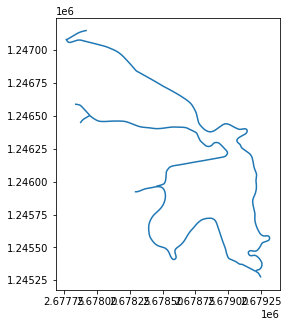

In [12]:
roads.plot() 

In [13]:
graph = momepy.gdf_to_nx(roads, approach='primal', length='length', )

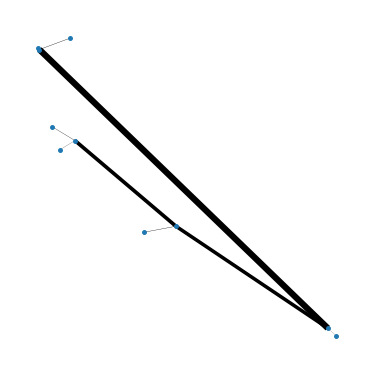

In [14]:
weights = nx.get_edge_attributes(graph,'length').values()

nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, node_size=15, width=[length/500 for length in list(weights)])


In [7]:
graph.get_edge_data(list(graph.edges)[0][0], list(graph.edges)[0][1])

{0: {'OBJECTID': 89616.0,
  'ERSTELLUNG': 2013,
  'BELAGSART': 100,
  'OBJEKTART': 11,
  'SHAPE_Leng': 269.3494467628767,
  'geometry': <shapely.geometry.linestring.LineString at 0x1685eea10>,
  'length': 269.3494467628767}}

In [8]:
nx.set_node_attributes(graph, nx.betweenness_centrality(graph), "betweenness")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


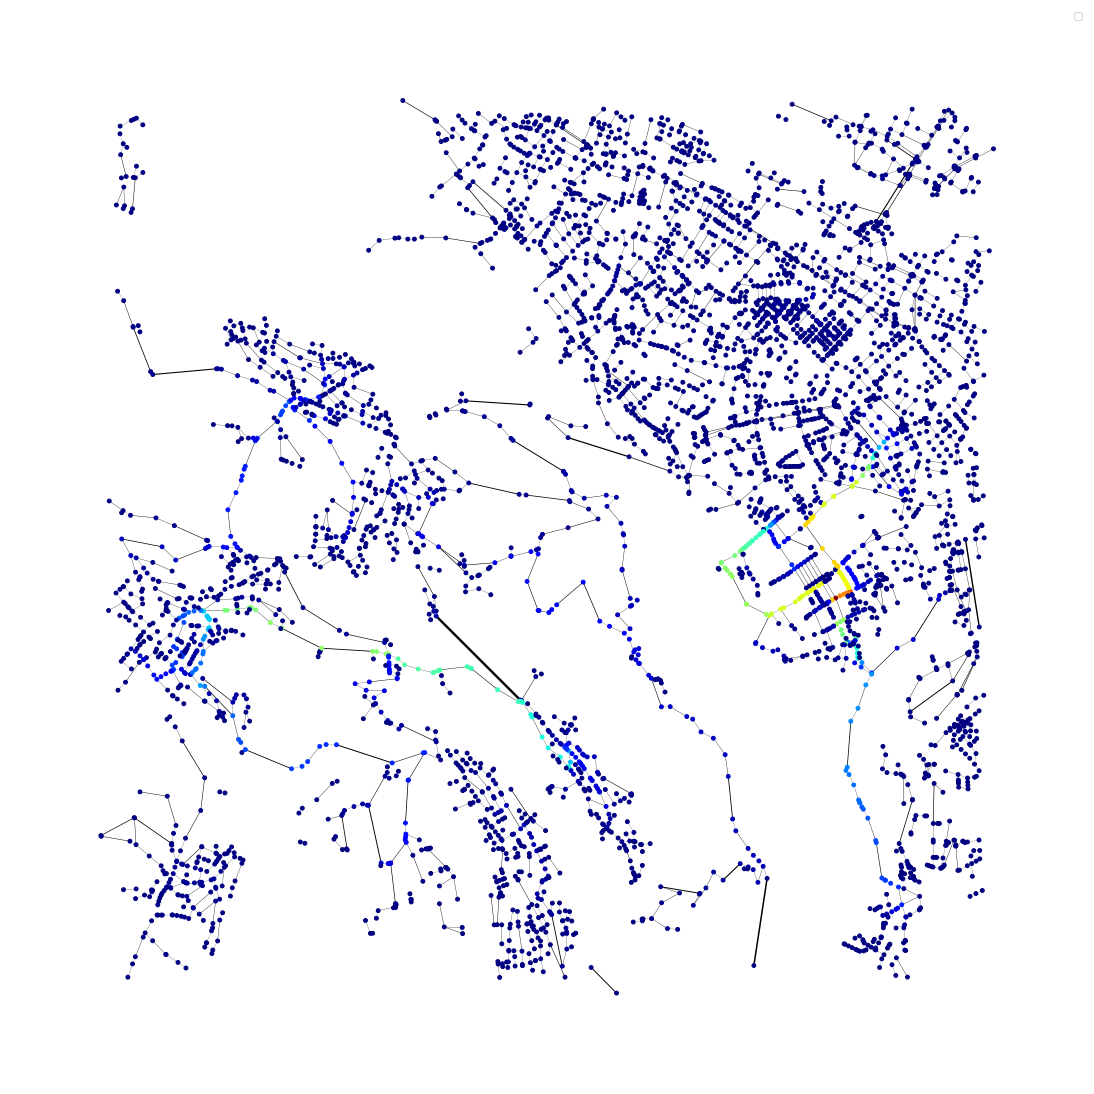

In [9]:
betweenness = nx.get_node_attributes(graph, "betweenness").values()

plt.rcParams['figure.figsize'] = [15, 15]
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, node_size=15, width=[length/500 for length in list(weights)], node_color=list(betweenness), cmap=plt.colormaps["jet"])
plt.legend()
plt.show()

In [19]:
graph.nodes(True)

NodeDataView({(2681562.890999999, 1247719.9560000002): {'betweenness': 0.0}, (2681563.6810000017, 1247983.984000001): {'betweenness': 8.39655942580968e-08}, (2681623.004999999, 1248089.9499999993): {'betweenness': 0.0}, (2681835.4800000004, 1247359.3790000007): {'betweenness': 0.0}, (2681722.210999999, 1247466.4560000002): {'betweenness': 0.0}, (2681643.568, 1247548.4699999988): {'betweenness': 0.0}, (2681597.4239999987, 1247618.2729999982): {'betweenness': 0.0}, (2681538.351, 1247868.8779999986): {'betweenness': 5.625694815292485e-06}, (2681560.879999999, 1247719.4279999994): {'betweenness': 0.0}, (2681562.0309999995, 1247984.8310000002): {'betweenness': 1.8304499548265102e-05}, (2681617.859000001, 1248087.0929999985): {'betweenness': 1.0411733688004003e-05}, (2681620.4250000007, 1248091.3260000013): {'betweenness': 0.0}, (2681566.3960000016, 1247700.1030000001): {'betweenness': 0.0}, (2681595.107999999, 1247617.9560000002): {'betweenness': 1.0159836905229712e-05}, (2681618.0810000002

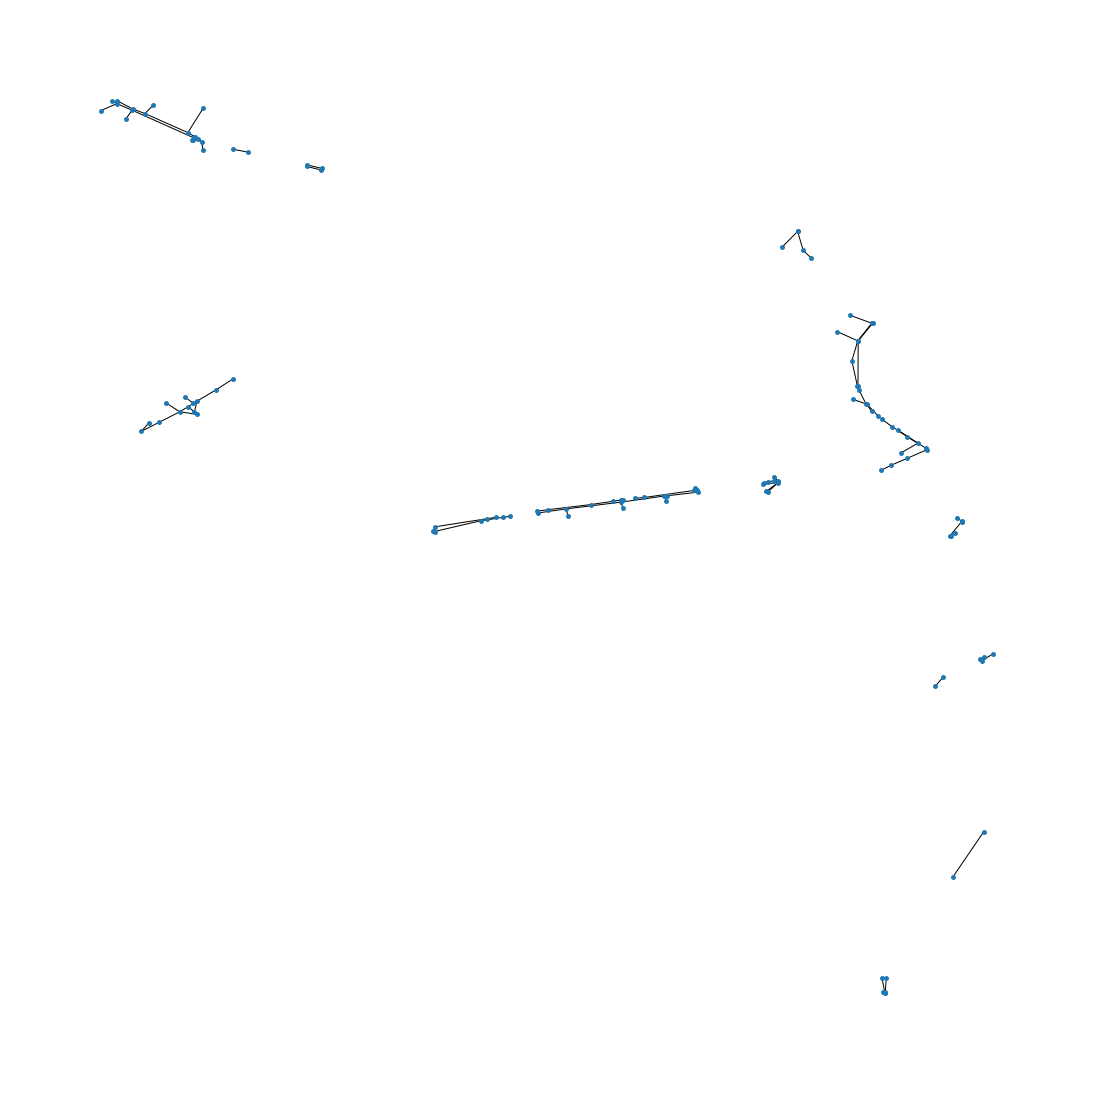

In [11]:
subset_edges = [edge for i, edge in enumerate(graph.edges()) if i < 100]
subset = nx.Graph()
subset.add_edges_from(subset_edges)


weights = nx.get_edge_attributes(subset,'length').values()
nx.draw(subset, {n:[n[0], n[1]] for n in list(subset.nodes)}, node_size=15, width=[length/500 for length in list(weights)])
